In [385]:
%pylab inline
font = {'size':16, 'family':'serif'}
matplotlib.rc('font', **font)

Populating the interactive namespace from numpy and matplotlib


In [386]:
Nbody1 = loadtxt('LMCMW-H6.txt')
A1_host = loadtxt('../../../orbits/data/LMC_1E11_1E12_free_a14_host.txt')
A1_sat = loadtxt('../../../orbits/data/LMC_1E11_1E12_free_a14_sat.txt')

In [387]:
# Results from the Nbody
NB_t1 = Nbody1[:,0] 
NB_R1 = Nbody1[:,1]
Xlmc1 = Nbody1[:,2]
Ylmc1 = Nbody1[:,3]
Zlmc1 = Nbody1[:,4]
Xmw1 = Nbody1[:,5]
Ymw1 = Nbody1[:,6]
Zmw1 = Nbody1[:,7]
NB_V1 = Nbody1[:,8]
vXlmc1 = Nbody1[:,9]
vYlmc1 = Nbody1[:,10]
vZlmc1 = Nbody1[:,11]
vXmw1 = Nbody1[:,12]
vYmw1 = Nbody1[:,13]
vZmw1 = Nbody1[:,14]

XNB = Xlmc1 - Xmw1
YNB = Ylmc1 - Ymw1
ZNB = Zlmc1 - Zmw1
VXNB = vXlmc1 - vXmw1
VYNB = vYlmc1 - vYmw1
VZNB = vZlmc1 - vZmw1
print NB_t1[0]

0.0


In [388]:
# Making Nbody and Analytic times equal
t1 = A1_host[:,0] 
# Defining galactocentric distances and velocities
x1 = A1_sat[:,1] - A1_host[:,1] 
y1 = A1_sat[:,2] - A1_host[:,2] 
z1 = A1_sat[:,3] - A1_host[:,3] 

vx1 = A1_sat[:,4] - A1_host[:,4] 
vy1 = A1_sat[:,5] - A1_host[:,5] 
vz1 = A1_sat[:,6] - A1_host[:,6] 

In [389]:
Rgal1 = np.sqrt(x1**2 + y1**2 + z1**2)
Vgal1 = np.sqrt(vx1**2 + vy1**2 + vz1**2)

In [390]:
R2vir1 = where(Rgal1 >= 280)[0]
IC1 = R2vir1[0]
#print Nbody_t[index[0]]
print IC1

1203


In [391]:
# Run with this ICs
print 'ICs:'
print 'positions: ',  x1[IC1], y1[IC1], z1[IC1]
print 'velocities: ', vx1[IC1], vy1[IC1], vz1[IC1]
dt = t1[IC1]
print dt

ICs:
positions:  44.286202 258.087062 -99.348823
velocities:  -23.995269 -196.008017 5.164705
-1.203


In [392]:
print Xlmc1[0]-Xmw1[0] 
print Ylmc1[0]-Ymw1[0]
print Zlmc1[0]-Zmw1[0]
print vXlmc1[0]-vXmw1[0]
print vYlmc1[0]-vYmw1[0]
print vZlmc1[0]-vZmw1[0]

44.286201
258.087062
-99.348854
-23.995369
-196.016034
5.164706


In [393]:
# Corrected ICs:
print x1[IC1] + (x1[IC1] - (Xlmc1[0]-Xmw1[0]))
print y1[IC1] + (y1[IC1] - (Ylmc1[0]-Ymw1[0]))
print z1[IC1] + (z1[IC1] - (Zlmc1[0]-Zmw1[0]))
print vx1[IC1] + (vx1[IC1] - (vXlmc1[0]-vXmw1[0]))
print vy1[IC1] + (vy1[IC1] - (vYlmc1[0]-vYmw1[0]))
print vz1[IC1] + (vz1[IC1] - (vZlmc1[0]-vZmw1[0]))

44.286203
258.087062
-99.348792
-23.995169
-196.0
5.164704


In [394]:
t1 = t1 - dt 

197.546798 197.538831222


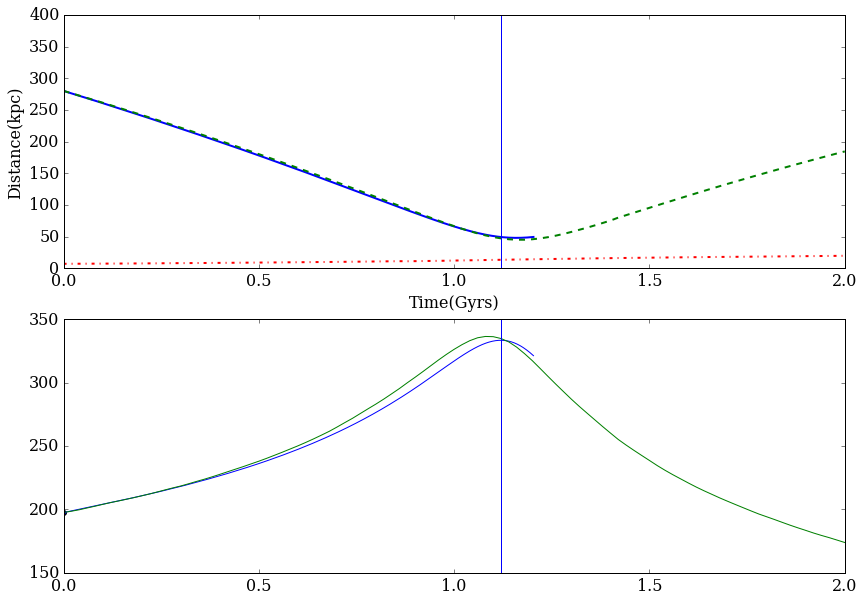

In [395]:
figure(figsize=(14, 10))
plt.subplot(2, 1, 1)
plot(t1, Rgal1, lw=2)
plot(NB_t1, NB_R1, lw=2, ls='--')
plot(NB_t1, np.sqrt(Xmw1**2 + Ymw1**2 + Zmw1**2), lw=2, ls='-.')
plt.ylabel('Distance(kpc)')
plt.xlabel('Time(Gyrs)')
xlim(0, 2)
ylim(0, 400)
plt.axvline(1.12)
plt.subplot(2, 1, 2)
plot(t1, Vgal1)
plot(NB_t1, NB_V1)
xlim(0.0,2)
ylim(150, 350)
print NB_V1[0], Vgal1[IC1]
scatter(0, Vgal1[IC1])
scatter(0, NB_V1[0])
plt.axvline(1.12)

In [396]:
RLMC = np.sqrt((XNB - x1[0])**2 + (YNB - y1[0])**2 + (ZNB - z1[0])**2)
VLMC = np.sqrt((VXNB - vx1[0])**2 + (VYNB - vy1[0])**2 + (VZNB - vz1[0])**2)
peri1 = where(RLMC == min(RLMC))

In [397]:
print 'Galactocentric Distances of the Nbody Sim at present day'
print Xlmc1[peri1]-Xmw1[peri1], Ylmc1[peri1]-Ymw1[peri1], Zlmc1[peri1]-Zmw1[peri1]
print 'Galactocentric Velocities of the Nbody Sim at present day'
print vXlmc1[peri1]-vXmw1[peri1], vYlmc1[peri1]-vYmw1[peri1], vZlmc1[peri1]-vZmw1[peri1]
print NB_t1[peri1]

Galactocentric Distances of the Nbody Sim at present day
[ 1.436735] [-40.775523] [-24.053635]
Galactocentric Velocities of the Nbody Sim at present day
[-43.74222] [-223.394928] [ 212.133295]
[ 1.22]


In [349]:
#print 'Galactocentric Distances of the Nbody Sim at Peri'
#print Xlmc05[peri05]-Xmw1[peri05], Ylmc1[peri05]-Ymw1[peri05], Zlmc1[peri05]-Zmw1[peri05]
#print 'Galactocentric Velocities of the Nbody Sim at Peri'
#print vXlmc05[peri05]-vXmw1[peri05], vYlmc1[peri05]-vYmw1[peri05], vZlmc1[peri05]-vZmw1[peri05]

In [350]:
print 'Galactocentric Distances of the LMC at actual position Analytic'
print x1[0], y1[0], z1[0]
print vx1[0], vy1[0], vz1[0]

Galactocentric Distances of the LMC at actual position Analytic
-1.0 -41.0 -28.0
-57.0 -226.0 221.0


In [291]:
print 'MW CM displacement:'
print Xmw1[peri1], Ymw1[peri1], Zmw1[peri1]

MW CM displacement:
[ 7.102694] [ 9.726302] [-7.790078]


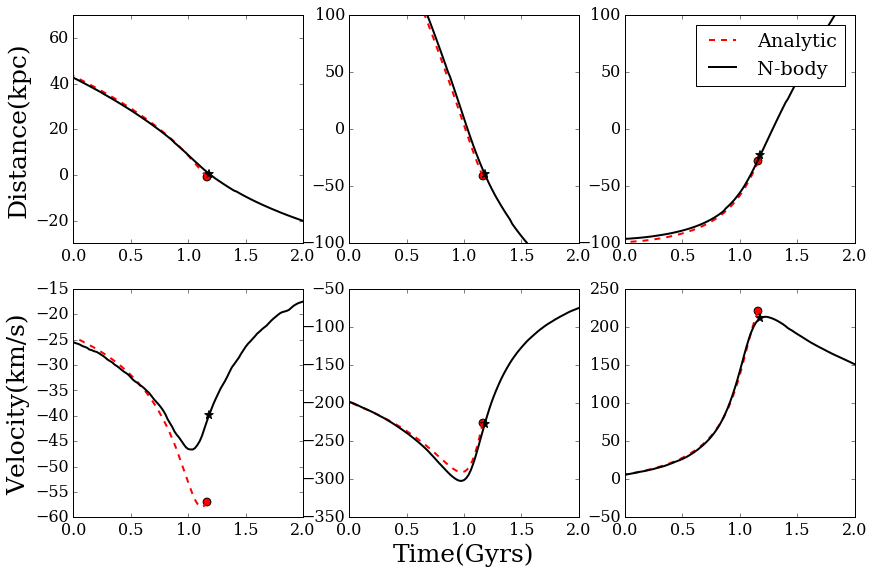

In [292]:
figure(figsize(14, 9))
plt.subplot(2, 3, 1)
plot(t1, x1, lw=2, ls='--', c='r')
#plot(t05, x05, lw=2, ls='--', c='b')
scatter(t1[0], x1[0], s=60, c='r')
scatter(NB_t1[peri1], Xlmc1[peri1]-Xmw1[peri1], marker='*', s=80, c='k')
plot(NB_t1, Xlmc1-Xmw1, lw=2, label='Full Df', c='k')
#plot(NB_t05, Xmw05-Xlmc05, lw=2, label='0.5 DF', c='b')
xlim(0, 2)
plt.ylabel('Distance(kpc)', fontsize=25)

plt.subplot(2, 3, 2)
plot(t1, y1, lw=2, ls='--', c='r')
scatter(t1[0], y1[0], s=60, c='r')
scatter(NB_t1[peri1], Ylmc1[peri1]-Ymw1[peri1], marker='*', c='k', s=80)

#plot(t05, y05, lw=2, ls='--', c='b')
plot(NB_t1, Ylmc1-Ymw1, lw=2, label='Full Df', c='k')
#plot(NB_t05, Ymw05-Ylmc05, lw=2, label='0.5 DF', c='b')
xlim(0, 2)
ylim(-100, 100)

plt.subplot(2, 3, 3)
plot(t1, z1, lw=2, label='Analytic', c='r', ls='--')
scatter(t1[0], z1[0], s=60, c='r')
scatter(NB_t1[peri1], Zlmc1[peri1]-Zmw1[peri1], marker='*', c='k', s=80)
#plot(t05, z05, lw=2, ls='--', c='b')
plot(NB_t1, Zlmc1-Zmw1, lw=2, label='N-body', c='k')
#plot(NB_t05, Zmw05-Zlmc05, lw=2, label='0.5 DF', c='b')
xlim(0, 2)
ylim(-100, 100)
legend()

plt.subplot(2, 3, 4)
plot(t1, vx1, lw=2, ls='--', c='r')
scatter(t1[0], vx1[0], s=60, c='r')
scatter(NB_t1[peri1], vXlmc1[peri1]-vXmw1[peri1], marker='*', c='k', s=80)
#plot(t05, vx05, lw=2, ls='--', c='b')
plot(NB_t1, vXlmc1-vXmw1, lw=2, label='Full Df', c='k')
#plot(NB_t05, vXmw05-vXlmc05, lw=2, label='0.5 DF', c='b')
plt.ylabel('Velocity(km/s)', fontsize=25)
xlim(0, 2)

plt.subplot(2, 3, 5)
plot(t1, vy1, lw=2, ls='--', c='r')
scatter(t1[0], vy1[0], s=60, c='r')
#plot(t05, vy05, lw=2, ls='--', c='b')
plot(NB_t1, vYlmc1-vYmw1, lw=2, label='Full Df', c='k')
scatter(NB_t1[peri1], vYlmc1[peri1]-vYmw1[peri1], marker='*', c='k', s=80)
#plot(NB_t05, vYmw05-vYlmc05, lw=2, label='0.5 DF', c='b')
xlim(0, 2)

plt.xlabel('Time(Gyrs)', fontsize=25)
plt.subplot(2, 3, 6)
plot(t1, vz1, lw=2, ls='--', c='r')
scatter(t1[0], vz1[0], s=60, c='r')
#plot(t05, vz05, lw=2, ls='--', c='b')
plot(NB_t1, vZlmc1-vZmw1, lw=2, label='Full Df', c='k')
scatter(NB_t1[peri1], vZlmc1[peri1]-vZmw1[peri1], marker='*', c='k', s=80)
#plot(NB_t05, vZmw05-vZlmc05, lw=2, label='0.5 DF', c='b')
xlim(0, 2)
savefig('a1ICsH3.png', bbox_inches='tight')